**Exercise 3: Multi class Classification and Neural Networks** 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
from scipy.io import loadmat
from scipy import optimize
from scipy.optimize import fmin_cg
from random import randint
import seaborn as sns
import warnings

**Take inputs, see some sample data**

['y', 'X', '__version__', '__header__', '__globals__']
['Theta2', '__version__', '__header__', 'Theta1', '__globals__']
(5000, 400) (5000, 1)
(25, 401) (10, 26)

Random sample


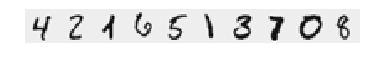

In [2]:
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style("darkgrid")

data = loadmat('ex3data1.mat')
weights = loadmat('ex3weights.mat')
print data.keys()
print weights.keys()

X = np.array(data['X'])
y = np.array(data['y'])
Theta1 = np.array(weights['Theta1'])
Theta2 = np.array(weights['Theta2'])

print X.shape, y.shape
print Theta1.shape, Theta2.shape

rand = randint(0, 5000)
sample = X[np.random.choice(X.shape[0], 10, replace=False), :]

print '\nRandom sample'
plt.imshow(sample.reshape((-1, 20)).T, cmap='gray_r')
plt.axis('off')
plt.show()

## Multi-class Logistic Regression

In [3]:
lamb = 16

# Sigmoid function
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))


# Logistic regression cost without regularization
def cost(thetas, x, y):
    h = sigmoid(x.dot(thetas))
    m = float(x.shape[0])
    p1 = - y.T.dot(np.log(h))
    p2 = - (1 - y).T.dot(np.log(1 - h))
    ans = (1/(m)) * (p1 + p2)
    
    try:
        ans = ans[0][0]
    except:
        ans = ans[0]
    
    if np.isnan(ans):
        return np.inf
    else:
        return ans


# Logistic regression with regularization
def reg_cost(thetas, x, y):
    cost_wo_reg = cost(thetas, x, y)
    m, n = x.shape
    reg_term = (lamb/(2.0*float(m))) * np.sum(np.square(thetas[1:]))
    return cost_wo_reg + reg_term
    

# Gradient
def reg_grad(thetas, x, y):
    h = sigmoid(x.dot(thetas)).reshape(x.shape[0], 1)
    m = float(x.shape[0])
    ans = ((1/m) * (h - y).T.dot(x)) + (lamb/m * thetas.T)
    return ans.flatten()


# Predict one value
def predict(xx, thetasopt):
    return (sigmoid(xx.dot(thetasopt)) > 0.5).astype(int)


# Get list of prediction probabilities and the most likely class
def predict_prob(xx, allthetas):
    prediction = np.zeros((11,1))
    
    for i in range(1, 11):
        prediction[i] = sigmoid(xx.dot(allthetas[i])).flatten()[0]

    return (prediction, np.argmax(prediction), prediction[np.argmax(prediction)][0])


# Accuracy for one class
def get_accuracy(X, y, thetasopt):
    predictions = predict(X, thetasopt)
    sums = sum(predictions == y.flatten())
    return sums/float(predictions.shape[0])


def get_aggregate_accuracy(X, y, allthetas):
    accuracy = np.zeros((11, 1))
    for i in range(1, 11):
        accuracy[i] = get_accuracy(X, (y == i).astype(int), allthetas[i])
    
    return np.sum(accuracy)/10

**Train the logistic regression model**

In [4]:
def train(X, y):
    allthetas = [[] for dd in range(11)]
    m, n = X.shape
    XX = np.append(np.ones((m ,1)), X, 1)

    for i in range(1, 11):
        Yvals = (y == i).astype(int)
        print 'Training', i
        thetas = np.zeros((n+1, 1))
        get_min = optimize.minimize(cost, thetas, options={"maxiter":400}, jac=reg_grad, args=(XX, Yvals), method=None)
        thetasopt = get_min.x
        allthetas[i] = np.array(thetasopt)

    allthetas = np.array(allthetas)
    return allthetas
    
allthetas = train(X, y)

Training 1
Training 2
Training 3
Training 4
Training 5
Training 6
Training 7
Training 8
Training 9
Training 10


**Test out the training data with predictions and check it's accuracy**

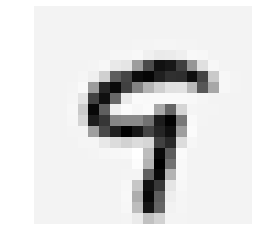

Predicted value: 9
Confidence: 0.463794199179

Training set accuracy:  97.358


In [8]:
pred_index = 4700
m, n = X.shape
XX = np.append(np.ones((m ,1)), X, 1)


plt.imshow(X[pred_index].reshape((-1, 20)).T, cmap='gray_r')
plt.axis('off')
plt.show()

preds = (predict_prob(XX[pred_index], allthetas))

print 'Predicted value:', preds[1]
print 'Confidence:', preds[2]

print '\nTraining set accuracy: ',\
        get_aggregate_accuracy(XX, y, allthetas)*100

## Neural network

In [9]:
def create_nn_model(Theta1, Theta2, XX):
    h = sigmoid(Theta1.dot(XX.T))
    l1 = np.append(np.ones((1, h.shape[1])), h, 0)
    h1 = sigmoid(Theta2.dot(l1))
    ans = np.argmax(h1, axis=0) + (np.repeat(1, h1.shape[1]))
    
    return ans

**Test out the Neural network**

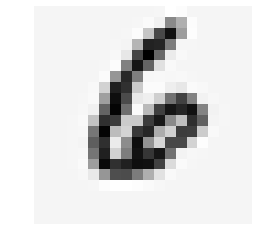

Training set accuracy 97.52
Predicted: 6


In [10]:
model = create_nn_model(Theta1, Theta2, XX)

yy = y.flatten()
acc = model[model == yy].shape[0]/float(model.shape[0])
    
    
pred_index = 3000

plt.imshow(X[pred_index].reshape((-1, 20)).T, cmap='gray_r')
plt.axis('off')
plt.show()

print 'Training set accuracy', acc*100
print 'Predicted:', model[pred_index]